<a href="https://colab.research.google.com/github/dayananikol/dl_models/blob/main/LAST_MODEL2_bentory_wUnknown7_1stDataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import os

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


In [ ]:
# Set paths
dataset_dir = '/content/drive/MyDrive/bentory_dataset/final_ready_dataset'

# Define image size and batch
IMG_SIZE = 224
BATCH_SIZE = 32

# # Generator with augmentation for training/validation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# # or try with these augmentation,
# datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=20,             # slight increase
#   width_shift_range=0.1,
#    height_shift_range=0.1,
#   zoom_range=0.2,                # increase zoom randomness
#    shear_range=0.1,               # simulate perspective tilt
#    brightness_range=[0.8, 1.2],   # simulate lighting changes
#    horizontal_flip=True,
#    validation_split=0.2,
#    fill_mode='nearest'            # handle empty pixels after rotation/shift
# )


# Train generator
train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Validation generator
val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# Test generator (no augmentation, no split)
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/bentory_dataset/final_ready_dataset_test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 3832 images belonging to 11 classes.
Found 957 images belonging to 11 classes.
Found 550 images belonging to 11 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.3),


    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.3),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# model.compile(
#     optimizer=SGD(learning_rate=0.01, momentum=0.9), # Example with learning rate and momentum
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4345 - loss: 1.5962

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.58154, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 670s 6s/step - accuracy: 0.4361 - loss: 1.5920 - val_accuracy: 0.8506 - val_loss: 0.5815
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8606 - loss: 0.4746
Epoch 2: val_loss improved from 0.58154 to 0.39857, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 570s 5s/step - accuracy: 0.8607 - loss: 0.4743 - val_accuracy: 0.8882 - val_loss: 0.3986
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8982 - loss: 0.3471
Epoch 3: val_loss did not improve from 0.39857
120/120 ━━━━━━━━━━━━━━━━━━━━ 550s 5s/step - accuracy: 0.8982 - loss: 0.3469 - val_accuracy: 0.8788 - val_loss: 0.4942
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9178 - loss: 0.2809
Epoch 4: val_loss improved from 0.39857 to 0.39356, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 583s 5s/step - accuracy: 0.9178 - loss: 0.2808 - val_accuracy: 0.9039 - val_loss: 0.3936
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9296 - loss: 0.2800
Epoch 5: val_loss did not improve from 0.39356
120/120 ━━━━━━━━━━━━━━━━━━━━ 623s 5s/step - accuracy: 0.9297 - loss: 0.2798 - val_accuracy: 0.8871 - val_loss: 0.5540
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9367 - loss: 0.2365
Epoch 6: val_loss improved from 0.39356 to 0.38055, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 547s 5s/step - accuracy: 0.9367 - loss: 0.2364 - val_accuracy: 0.9101 - val_loss: 0.3806
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9456 - loss: 0.2195
Epoch 7: val_loss did not improve from 0.38055
120/120 ━━━━━━━━━━━━━━━━━━━━ 582s 5s/step - accuracy: 0.9455 - loss: 0.2196 - val_accuracy: 0.8903 - val_loss: 0.4826
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9474 - loss: 0.1794
Epoch 8: val_loss did not improve from 0.38055
120/120 ━━━━━━━━━━━━━━━━━━━━ 547s 5s/step - accuracy: 0.9474 - loss: 0.1794 - val_accuracy: 0.9018 - val_loss: 0.5319


In [ ]:
loss, accuracy = model.evaluate(test_gen)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9801 - loss: 0.0842
Test Loss: 0.16833658516407013
Test Accuracy: 0.9563636183738708


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
predictions = model.predict(test_gen)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Evaluate the model
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step
Classification Report:
                         precision    recall  f1-score   support

             Bear Brand       1.00      1.00      1.00        50
                     C2       0.94      1.00      0.97        50
         Datu Puti Suka       0.94      1.00      0.97        50
         Datu Puti Toyo       0.93      1.00      0.96        50
                   Ligo       0.96      1.00      0.98        50
            Magic Sarap       0.98      0.84      0.90        50
Pancit Canton Kalamansi       0.96      1.00      0.98        50
              Safeguard       1.00      1.00      1.00        50
            Surf Powder       1.00      0.98      0.99        50
                Unknown       0.90      0.74      0.81        50
                  V Cut       0.91      0.96      0.93        50

               accuracy                           0.96       550
              macro avg       0.96      0.96      0.95       550
           weighted avg   

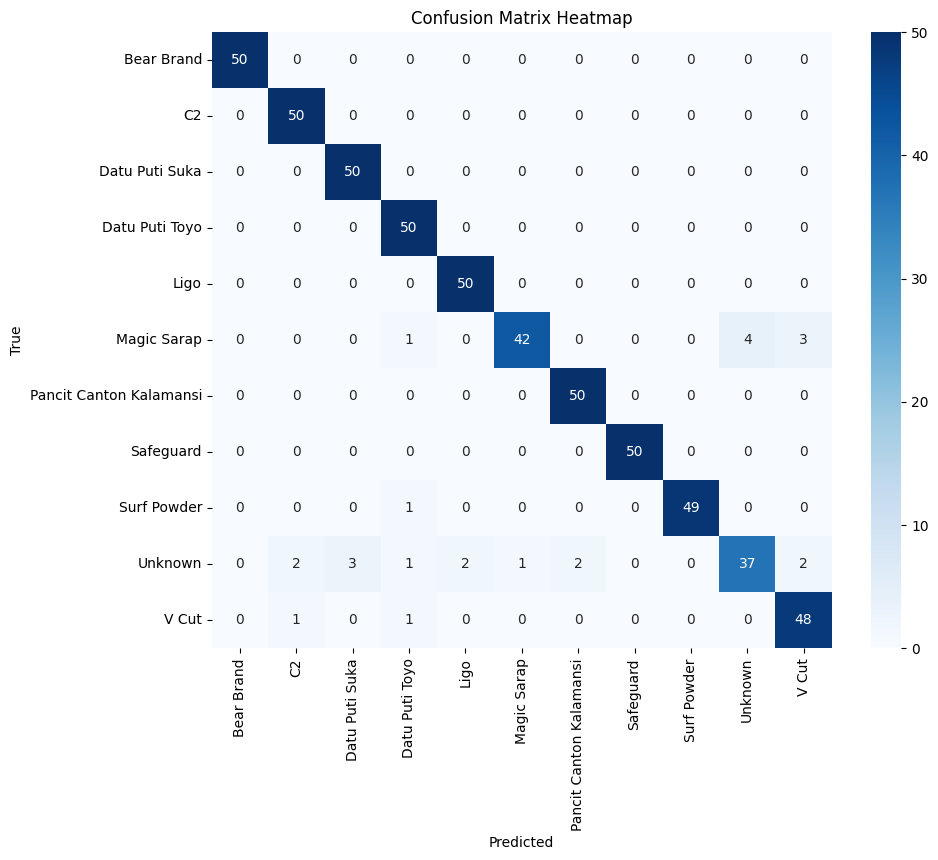

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Use the true_classes and predicted_classes calculated earlier
true_labels = true_classes
pred_labels = predicted_classes

# Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
class_names = list(test_gen.class_indices.keys()) # Use class names from test_gen

# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

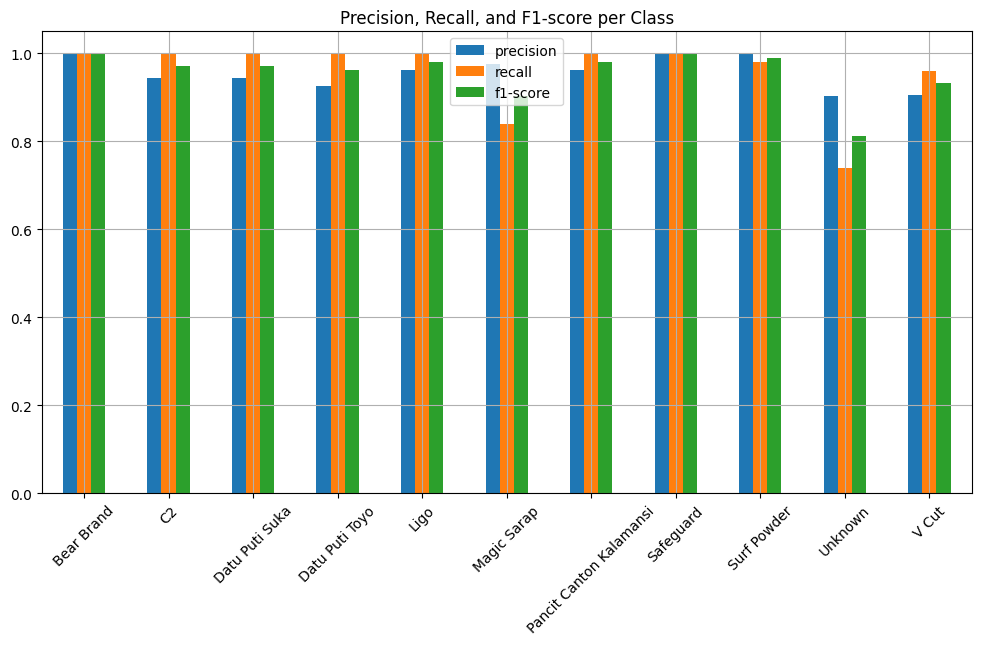

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Get classification report as dictionary
report = classification_report(true_labels, pred_labels, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot
df_report.iloc[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title('Precision, Recall, and F1-score per Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


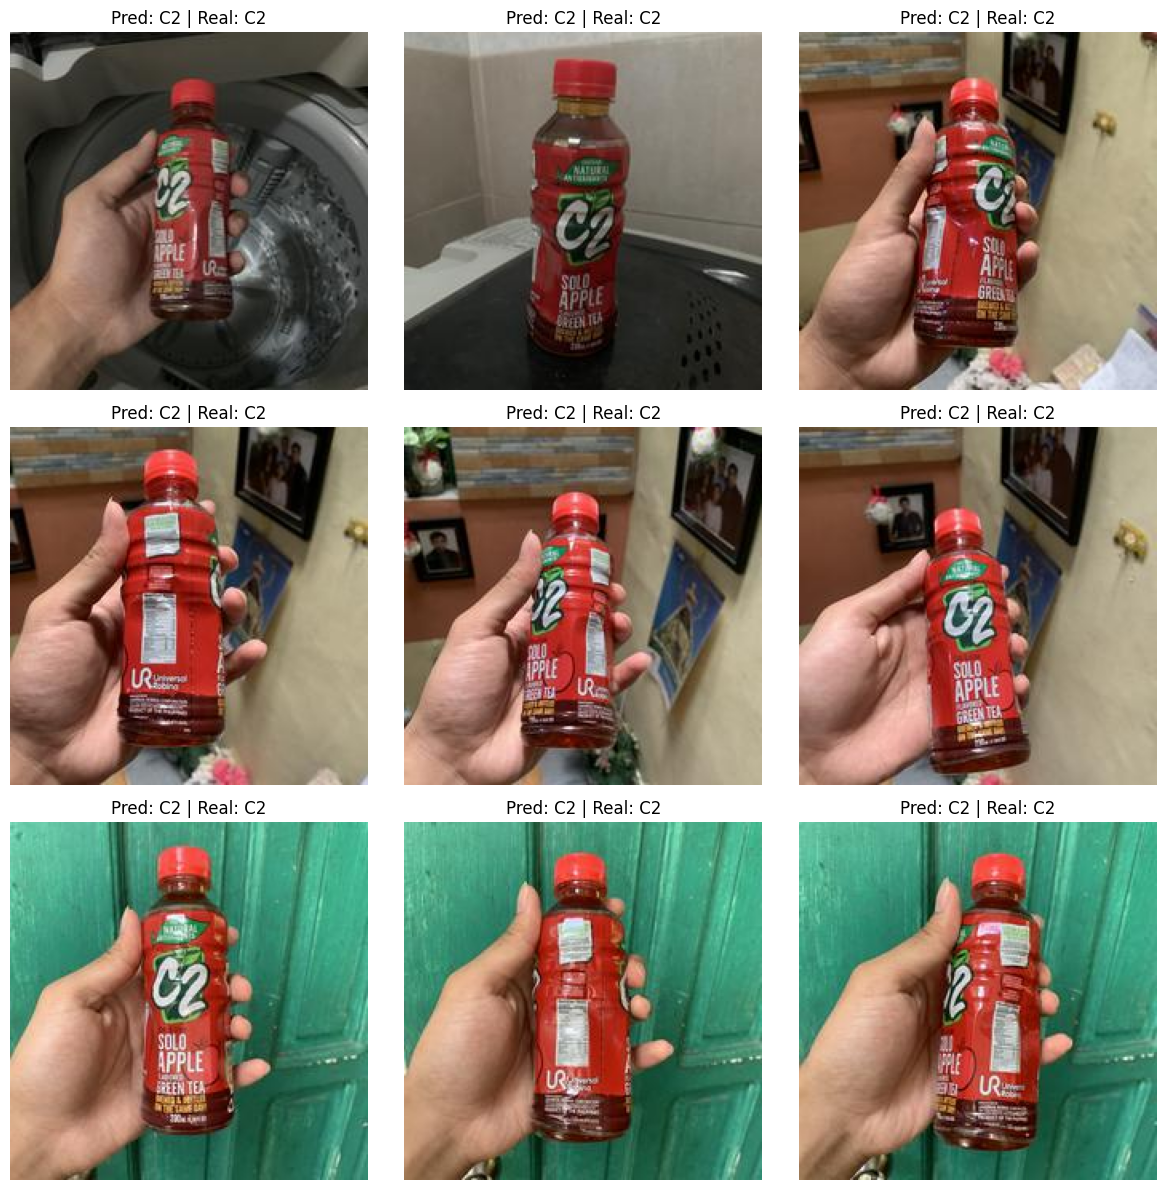

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images and labels from the test generator
images, labels = next(test_gen)

# Get the class names from the generator
class_names = list(test_gen.class_indices.keys())

# Select the first 9 images and their true labels
num_images_to_show = 9
selected_images = images[:num_images_to_show]
selected_labels = labels[:num_images_to_show]

# Determine the true class names for the selected labels
true_class_names = [class_names[np.argmax(label)] for label in selected_labels]

# Get predictions for the selected images
predictions = model.predict(selected_images)
predicted_classes = np.argmax(predictions, axis=1)
predicted_class_names = [class_names[predicted_class] for predicted_class in predicted_classes]

# Plot the images
plt.figure(figsize=(12, 12))
for i in range(num_images_to_show):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f"Pred: {predicted_class_names[i]} | Real: {true_class_names[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [60]:
import tensorflow as tf

h5_model_path = 'best_model.h5'

model = tf.keras.models.load_model(h5_model_path)

    # Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

drive_save_path = '/content/drive/MyDrive/bentory_dataset//best_model.tflite' # <--- Change 'your_model_folder'

# Save the TensorFlow Lite model to a file
with open('best_model.tflite', 'wb') as f:
    f.write(tflite_model)

# import tensorflow as tf
# import os

# # Path to your trained .h5 model file
# h5_model_path = 'best_model.h5'

# # Load the model from the .h5 file
# model = tf.keras.models.load_model(h5_model_path)

# # Define a directory to save the model in the SavedModel format
# saved_model_dir = 'saved_model_directory'

# # Save the model in the SavedModel format using model.export()
# # This is the correct method for exporting to the SavedModel format
# model.export(saved_model_dir)

# # Now use the directory path with the TFLiteConverter
# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# # Optional: Apply optimization (reduce size)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# # Convert the model
# tflite_model = converter.convert()

# # Save to file
# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)

# print("✅ Model successfully converted to model.tflite")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'best_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
h5_model_path = 'best_model.h5'

model = tf.keras.models.load_model(h5_model_path)

    # Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

drive_save_path = '/content/drive/MyDrive/bentory_dataset/best_model.tflite' # <--- Change 'your_model_folder'

# Save the TensorFlow Lite model to a file
with open('best_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpnh7x0yrh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  133346148445136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346148449936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346877753104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346877751376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346877753680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346877752720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346149073744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346149075088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346149074704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346149077776: TensorSpec(shape=(), dtype=tf.resource, name=None)


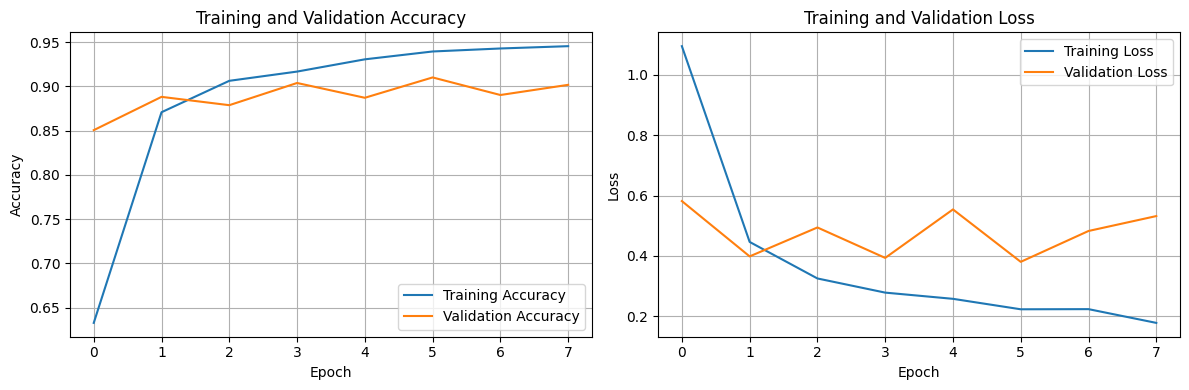

In [ ]:
import matplotlib.pyplot as plt

# Get the history from the training
# Assuming 'history' or 'history_continued' contains the training history
# If you ran the last cell, use history_continued, otherwise use history
# Let's use 'history' for now, assuming the last run didn't complete fully.
# If you successfully ran the cell to continue training, change 'history' to 'history_continued'
training_history = history

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print(class_names)